<a href="https://colab.research.google.com/github/harkpun/Google-Play-Store-Analysis/blob/main/Play_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# mounting notebook on google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# reading both CSV Files From Drive and storing in dataframe
ps_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - EDA/Play Store Data.csv')
ur_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - EDA/User Reviews.csv')

# **Exploring Dataset**

**Apps dataset columns descriptions:**

There are 9 features that describe a given app.

* **App:** Name of the app
* **Category:** Category of the app.
* **Rating**: The current average rating (out of 5) of the app on Google Play
* **Reviews**: Number of user reviews given on the app
* **Size:** Size of the app in MB (megabytes)
* **Installs:** Number of times the app was downloaded from Google Play
* **Type**: Whether the app is paid or free
* **Price**: Price of the app in US$
* **Last Updated**: Date on which the app was last updated on Google Play

In [4]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
ps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
ps_df.shape

(10841, 13)

In [7]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
# droping current version and android version columns which are not much that important from play store dataframe.
ps_df.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)

In [9]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
dtypes: float64(1), object(10)
memory usage: 931.8+ KB


In [10]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

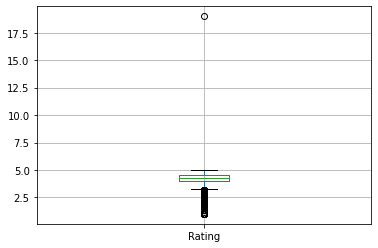

In [12]:
# checking for the oulier 
ps_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4d907bc90>]],
      dtype=object)

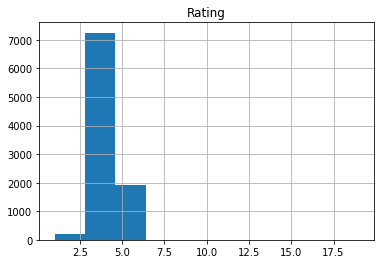

In [13]:
ps_df.hist()

In [14]:
# checking how many rating are more than 5 outlier
ps_df[ps_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


In [15]:
# deleting outlier row to getting proper insights from dataframe
ps_df.drop([10472], inplace=True)

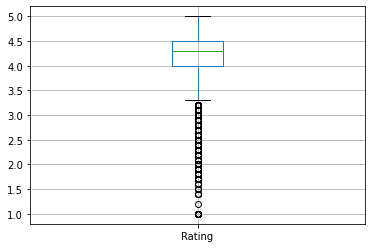

In [16]:
ps_df.boxplot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4d8af0b10>]],
      dtype=object)

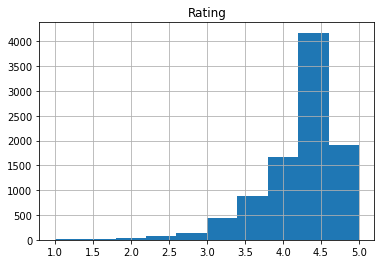

In [17]:
ps_df.hist()

# **Type Casting**

In [18]:
def printinfo():
    temp = pd.DataFrame(index=ps_df.columns)
    temp['data_type'] = ps_df.dtypes
    temp['null_count'] = ps_df.isnull().sum()
    temp['unique_count'] = ps_df.nunique()
    return temp

printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,1474,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,1,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Converting
* Reviews
* Size
* Installs
* Price 

to numeric.

In [19]:
# converting Reviews column from object to numeric dtype  
ps_df['Reviews'] = ps_df['Reviews'].astype(int)

In [20]:
# converting Price column from object to numeric dtype
ps_df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [21]:
ps_df['Price'] = ps_df['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
ps_df['Price'] = round(ps_df['Price'].apply(lambda x : float(x)))

In [22]:
# converting Installs column from object to numeric dtype
ps_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [23]:
ps_df['Installs'] = ps_df['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
ps_df['Installs'] = ps_df['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
ps_df['Installs'] = ps_df['Installs'].apply(lambda x : int(x))

In [24]:
# converting Size column from oject to numeric dtype
ps_df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [25]:
#converting Kb into Mb
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: float(x))

In [26]:
#Converting Last Updated column from string to Timestamp
ps_df['Last Updated'] = pd.to_datetime(ps_df['Last Updated'])

In [27]:
# new column - Total Earning based on number of Installs 
ps_df['Total Earning'] = ps_df['Installs']*ps_df['Price']

In [28]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,0.0


In [29]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,1474,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,int64,0,20
Type,object,1,2
Price,float64,0,41
Content Rating,object,0,6
Genres,object,0,119


In [30]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price,Total Earning
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,1.084000e+04
mean,4.191757,4.441529e+05,21.516530,1.546434e+07,1.023616,3.575127e+04
std,0.515219,2.927761e+06,22.588748,8.502936e+07,15.949766,1.067125e+06
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000,0.000000e+00
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000,0.000000e+00
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000,0.000000e+00
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000,0.000000e+00
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,7.000000e+07


# **Data Imputation**

In [31]:
def impute_median(column):
  '''
  Imputing median value as NaN value for Numerical datatype.
  For 'Rating' and 'Size' column - Replacing NaN values with the median of a DataFrame column.
  '''
  return column.fillna(column.median(), inplace=True)

In [32]:
# replacing NaN values with median value for Rating column
impute_median(ps_df['Size'])

In [33]:
# replacing NaN values with median value for Rating column
impute_median(ps_df['Rating'])

In [34]:
def impute_mode(column):
  '''
  Imputing mode value as NaN value for Categorical datatype.
  For 'Type' column - Replacing NaN values with the mode of a DataFrame column.
  '''
  return column.fillna(str(column.mode()), inplace=True)

In [35]:
# replacing NaN values with mode value for Type column
impute_mode(ps_df['Type'])

In [36]:
ps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
3143,PagesJaunes - local search,TRAVEL_AND_LOCAL,3.8,43935,13.0,10000000,Free,0.0,Everyone,Travel & Local,2018-08-01,0.0
6886,My Budget Book,FINANCE,4.7,19784,7.3,100000,Paid,3.0,Everyone,Finance,2018-06-13,300000.0
4738,WPSApp,TOOLS,4.4,95080,3.1,10000000,Free,0.0,Everyone,Tools,2018-08-03,0.0
4212,Add-On: Alcatel (h),PRODUCTIVITY,4.5,107,1.2,50000,Free,0.0,Everyone,Productivity,2015-05-19,0.0
9557,Explora con el Chavo,FAMILY,4.3,0,13.0,100000,Free,0.0,Everyone,Educational,2018-06-26,0.0


In [37]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price,Total Earning
count,10840.000000,1.084000e+04,10840.00000,1.084000e+04,10840.000000,1.084000e+04
mean,4.206476,4.441529e+05,20.18484,1.546434e+07,1.023616,3.575127e+04
std,0.480342,2.927761e+06,20.97683,8.502936e+07,15.949766,1.067125e+06
min,1.000000,0.000000e+00,0.00850,0.000000e+00,0.000000,0.000000e+00
25%,4.100000,3.800000e+01,5.90000,1.000000e+03,0.000000,0.000000e+00
50%,4.300000,2.094000e+03,13.00000,1.000000e+05,0.000000,0.000000e+00
75%,4.500000,5.477550e+04,26.00000,5.000000e+06,0.000000,0.000000e+00
max,5.000000,7.815831e+07,100.00000,1.000000e+09,400.000000,7.000000e+07


In [38]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,0,459
Installs,int64,0,20
Type,object,0,3
Price,float64,0,41
Content Rating,object,0,6
Genres,object,0,119


# **Data Cleaning**

In [39]:
ps_df.App.value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [40]:
ps_df.App.nunique()

9659

**From the above data we can infer that there are lots of duplicate values for the same app. To remove the duplicate values we will first sort the dataframe by 'Last Updated' date in descending order then we will remove the duplicates. In this way we will have the information for the latest entry in the database.**

In [41]:
# for example ROBLOX app, either should be from game category or from family catagoty.
ps_df[ps_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,0.0


In [42]:
# sorting the dataset in descending order of Last Updated date.
ps_df.sort_values(by = 'Last Updated', ascending = False, inplace = True)

In [43]:
# deleting the duplicate entries of App.
ps_df.drop_duplicates(subset = ['App'], inplace = True)

In [44]:
ps_df['App'].nunique()

9659

In [45]:
ps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning
9598,Punch em,GAME,4.1,2208,4.4,500000,Free,0.0,Everyone,Arcade,2018-05-24,0.0
8659,Cal - Google Calendar + Widget,PRODUCTIVITY,4.2,86172,13.0,1000000,Free,0.0,Everyone,Productivity,2016-02-01,0.0
1045,MeAuDote - An act of love that saves a life,EVENTS,4.3,250,23.0,1000,Free,0.0,Everyone,Events,2018-06-22,0.0
4289,KDRAMA Amino for K-Drama Fans,SOCIAL,4.6,4046,63.0,100000,Free,0.0,Teen,Social,2018-07-13,0.0
8821,DS App Manager,TOOLS,4.6,14,2.1,1000,Free,0.0,Everyone,Tools,2015-03-21,0.0


In [46]:
ps_df.shape

(9659, 12)

###**User_Review dataframe.**

In [47]:
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [48]:
ur_df.shape

(64295, 5)

In [49]:
ur_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [50]:
# removing all the NaN value rows from user_review dataframe.
ur_df.dropna(inplace = True)

In [51]:
ur_df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [52]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [53]:
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [54]:
ur_df.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
18201,Bubble Shooter,To many ads!!!,Positive,0.976562,0.500
53094,Gboard - the Google Keyboard,The search option keyboard recently stopped wo...,Positive,0.208333,0.375
5434,"AliExpress - Smarter Shopping, Better Living",There play store makes satisfied buying online...,Positive,0.500000,0.800
61054,Hello Kitty Lunchbox,I liked make two things make better,Positive,0.550000,0.650
36164,DraftKings - Daily Fantasy Sports,Draftkings ROCKS!!,Neutral,0.000000,0.000


In [55]:
ur_df.shape

(37427, 5)

# **Data Visualization**


## **Graph 1 - Number of apps based on Category**

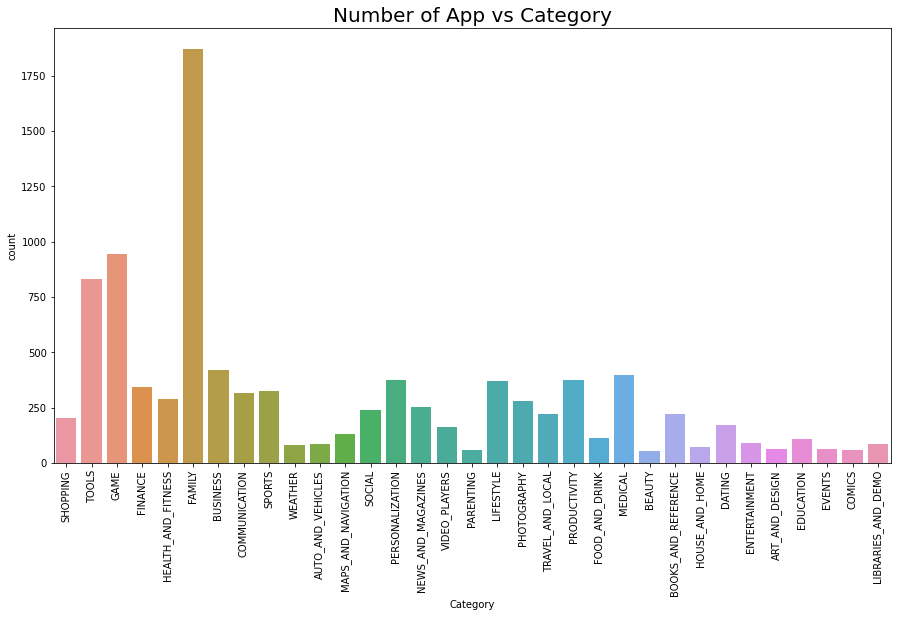

In [56]:
plt.figure(figsize=(15,8))
plt.title('Number of App vs Category', fontsize=20)

sns.countplot(x='Category', data=ps_df)
plt.xticks(rotation=90)
plt.show()

In [57]:
cat_count = ps_df.groupby(['Category']).size().reset_index(name='count')
cat_count.sort_values(by='count', ascending=False, inplace=True)
cat_count.head()

,Category,count
11,FAMILY,1873
14,GAME,942
29,TOOLS,829
4,BUSINESS,419
20,MEDICAL,395


### **Observation:** 
1. **FAMILY category has the highest number of apps and BEAUTY category has lowest number of apps.** 
2. **Top 5 category in the play store which have most number of apps are - FAMILY, GAME, TOOLS, BUSINESS & MEDICAL.** 

## **Graph 2 - Category wise number of installs.**

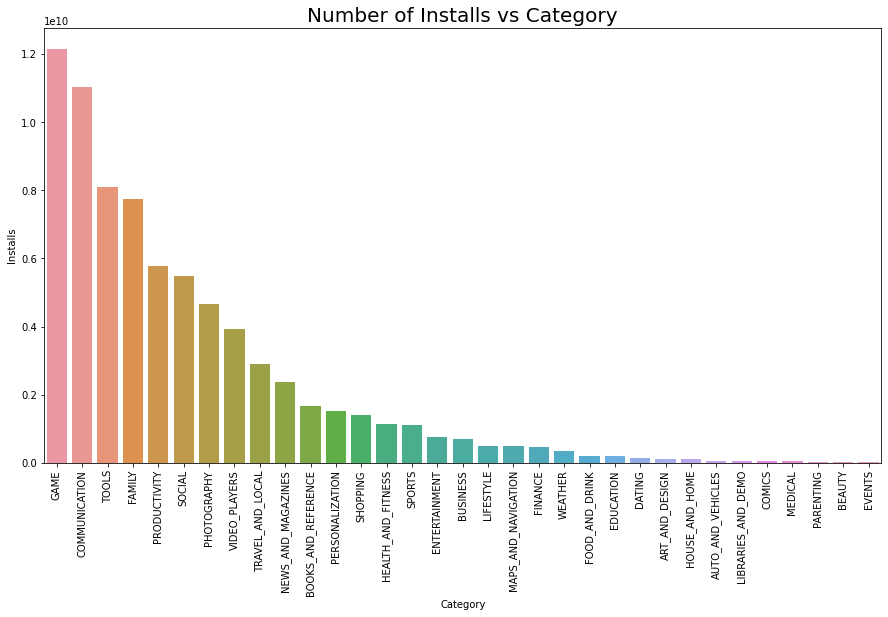

In [58]:
cat_install = ps_df.groupby(['Category'])[['Installs']].sum().reset_index()
cat_install.sort_values(by='Installs', ascending=False, inplace=True)

plt.figure(figsize=(15,8))
plt.title('Number of Installs vs Category', fontsize=20)

sns.barplot(x ='Category', y='Installs', data=cat_install)
plt.xticks(rotation=90)
plt.show()

In [59]:
cat_install.head()

,Category,Installs
14,GAME,12162924415
6,COMMUNICATION,11039276251
29,TOOLS,8102771915
11,FAMILY,7739441505
25,PRODUCTIVITY,5788091369


### **Observation:**
1. **GAME category has highest number of installs and EVENTS category has lowest number of installs.**
2. **Top 5 categories with most number of installs are - GAME, COMMUNICATION, TOOLS, FAMILY and PRODUCTIVITY.**
 

## **Graph 3 - Distribution of Rating**

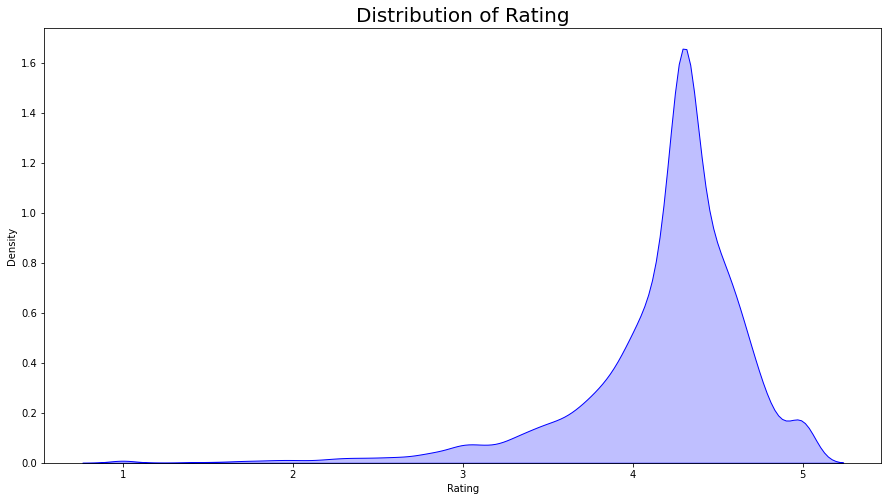

In [60]:
plt.figure(figsize=(15,8))
plt.title('Distribution of Rating', fontsize=20)

sns.kdeplot(ps_df.Rating, color="Blue", shade = True)
plt.show()

### **Observation:**
1. **Most of the apps in the google play store are rated between 3.5 to 4.7**

## **Graph 4 - Box plot to show Rating vs Category**

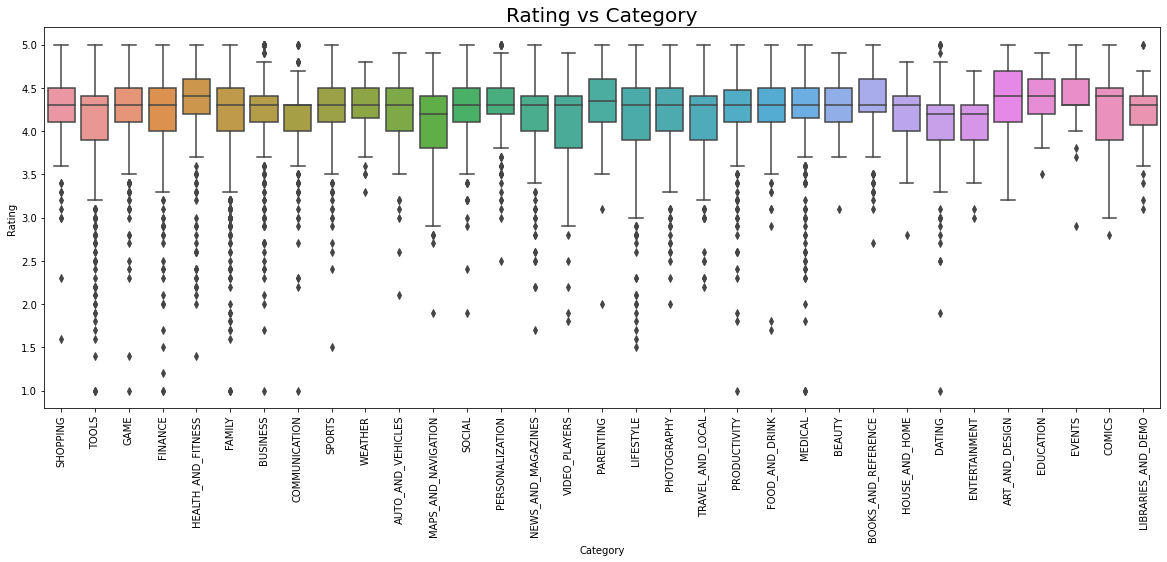

In [61]:
plt.figure(figsize=(20,7))
plt.title("Rating vs Category", fontsize=20)

sns.boxplot(x='Category', y='Rating', data=ps_df)
plt.xticks(rotation = 90)
plt.show()

In [62]:
cat_rating = ps_df.groupby(['Category'])['Rating'].median().reset_index(name = 'median')
cat_rating.sort_values(by ='median', ascending = False, inplace = True)
cat_rating.head()

,Category,median
0,ART_AND_DESIGN,4.40
5,COMICS,4.40
15,HEALTH_AND_FITNESS,4.40
8,EDUCATION,4.40
22,PARENTING,4.35


In [63]:
cat_rating.tail()

,Category,median
2,BEAUTY,4.3
32,WEATHER,4.3
19,MAPS_AND_NAVIGATION,4.2
9,ENTERTAINMENT,4.2
7,DATING,4.2


### **Observation:**
1. **Top 5 Category with highest ratings are - EVENTS, ART_AND_DESIGN, COMICS, EDUCATION, HEALTH_AND_FITNESS**
2. **Last 5 Category with lowest ratings are- DATING, ENTERTAINMENT, MAPS_AND_NAVIGATION, WEATHER, BEAUTY**

## **Graph 5 - Number of Apps vs Genres**

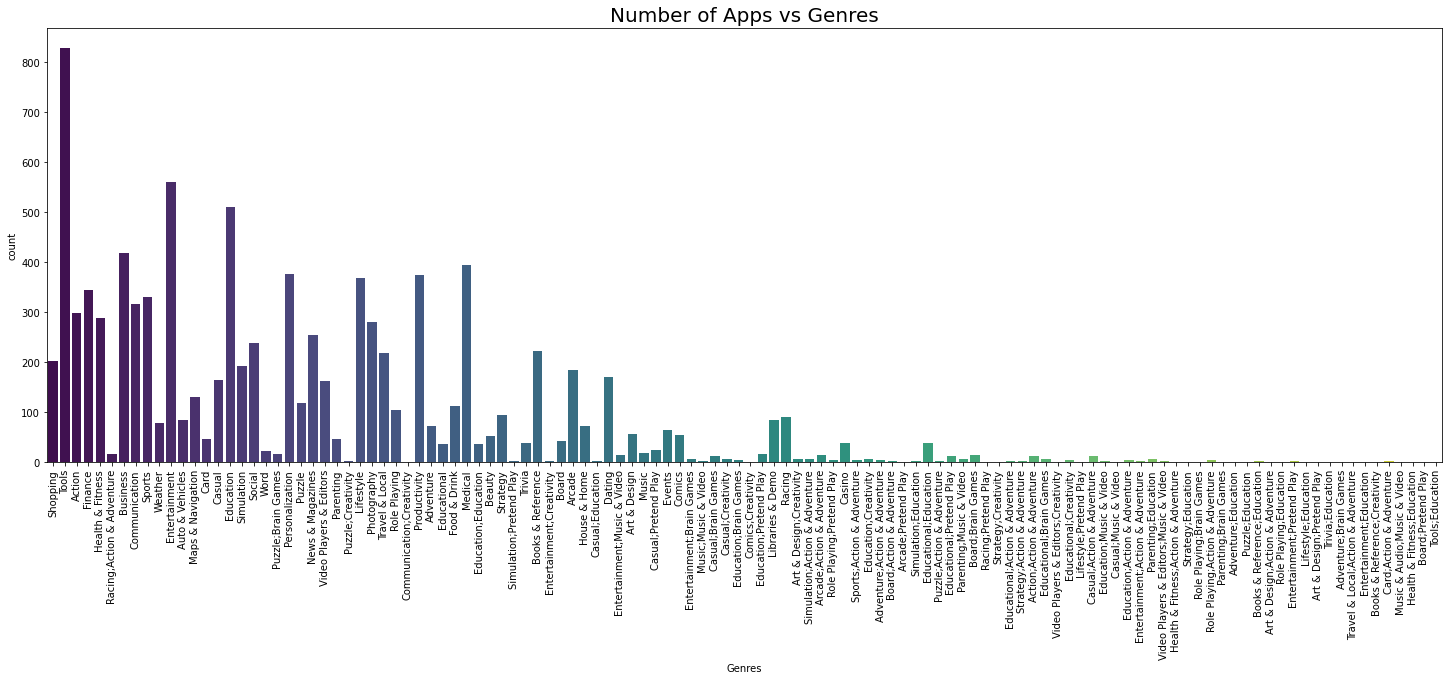

In [64]:
plt.figure(figsize=(25,8))
plt.title("Number of Apps vs Genres", fontsize=20)

sns.countplot(x = 'Genres', data = ps_df, palette= "viridis")
plt.xticks(rotation = 90)
plt.show()

In [65]:
gen_count = ps_df.groupby(['Genres']).size().reset_index(name = 'count')
gen_count.sort_values(by ='count', ascending = False, inplace = True)
gen_count.head()

,Genres,count
107,Tools,828
51,Entertainment,561
38,Education,510
22,Business,419
70,Medical,395


In [66]:
gen_count.tail()

,Genres,count
86,Puzzle;Education,1
76,Parenting;Brain Games,1
5,Adventure;Education,1
31,Casual;Music & Video,1
12,Art & Design;Pretend Play,1


### **Observation:**
1. **Least number of apps in play store are - Puzzle;Education, Parenting;Brain Games, Adventure;Education, Casual;Music & Video, Art & Design;Pretend Play.**
2. **Most number of apps in play store are - Tools, Entertainment, Education, Business & Medical.**

## **Graph 6 - Top 10 installed apps in any category:**

In [67]:
def findtop10incategory(str):
    str = str.upper()
    top10 = ps_df[ps_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

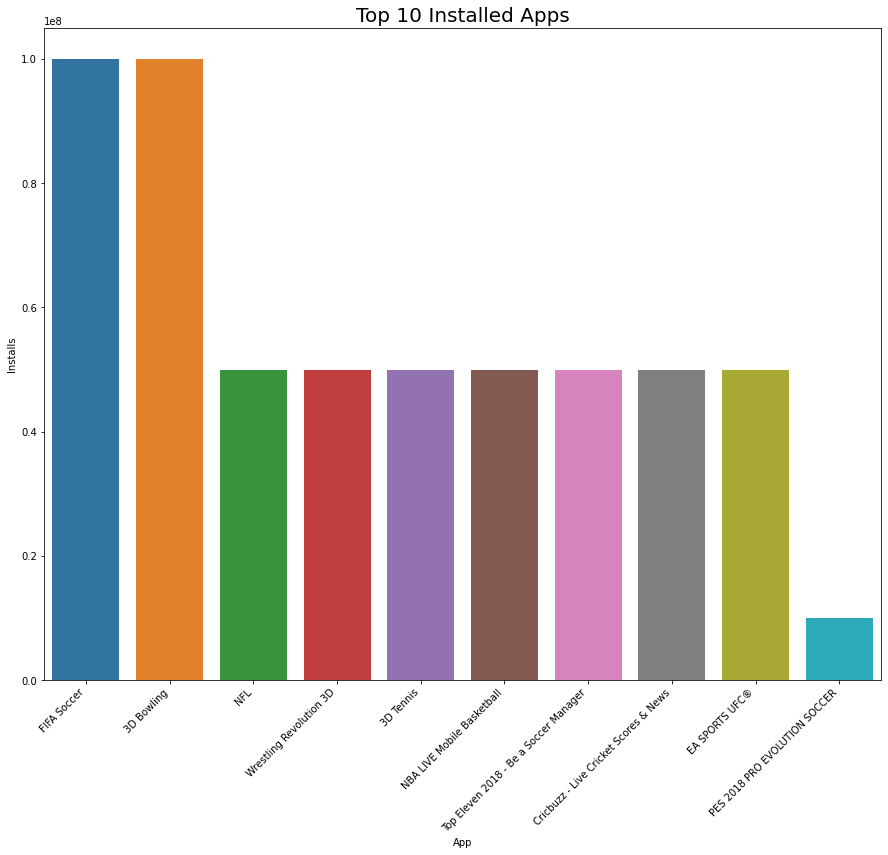

In [68]:
findtop10incategory('Sports')

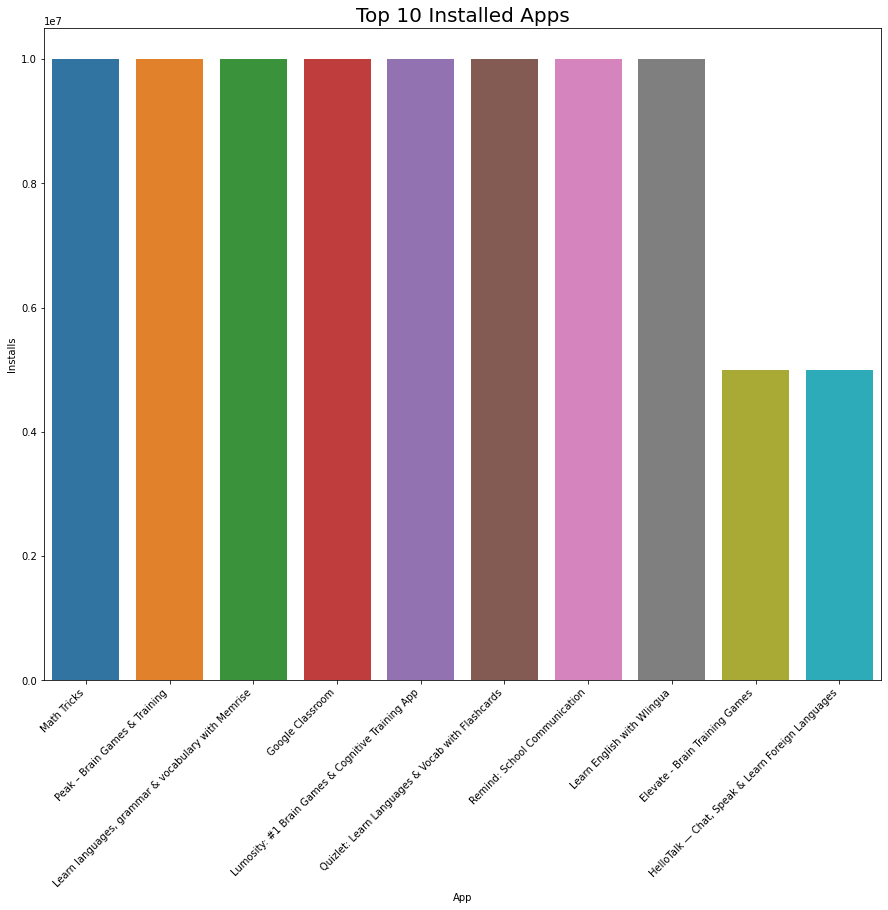

In [69]:
findtop10incategory('Education')

## **Graph 7 - Number of Apps vs Content Rating:**

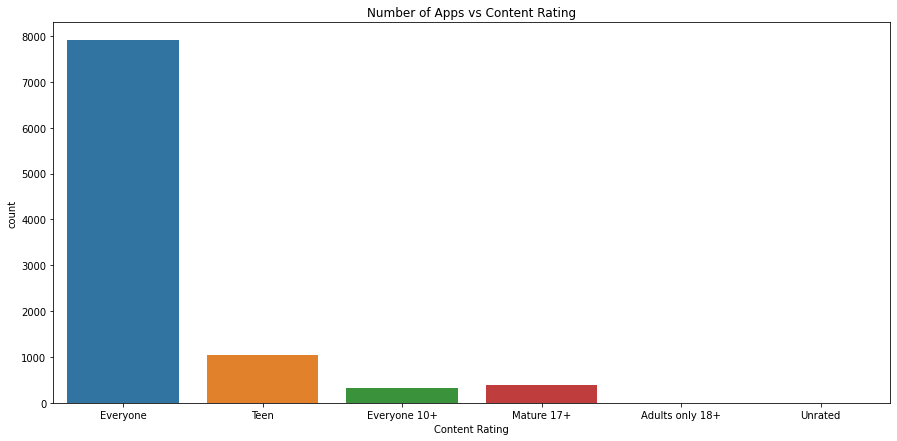

In [70]:
plt.figure(figsize=(15,7))
plt.title("Number of Apps vs Content Rating")

sns.countplot(x = 'Content Rating', data = ps_df)
plt.show()

### **Observation:**
1. **Most of the apps in the play store are with content rating Everyone.**

## **Graph 8 - Content Rating vs Rating:**

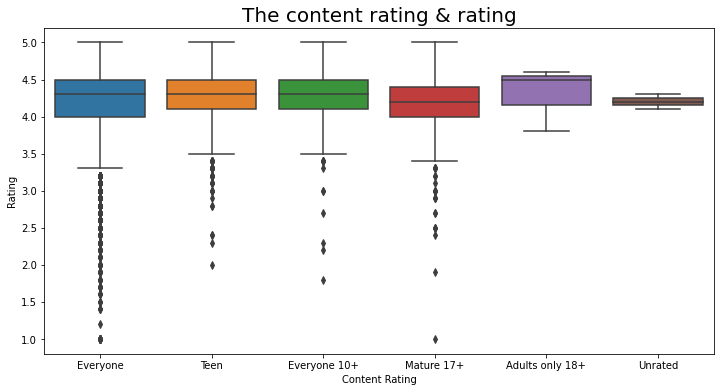

In [71]:
plt.figure(figsize=(12,6))
plt.title("The content rating & rating", size=20)

sns.boxplot(x = "Content Rating", y = "Rating", data = ps_df)
plt.show()

### **Observation:**
1. **The ratings are almost the same for Everyone, Teen, Everyone 10+.**
2. **The Everyone has more outliers than other categories.**
3. **Mature 17+ has the lowest average. The rating average of the 18+ category is higher than the others.**

## **Graph 9 - Category vs Price :**

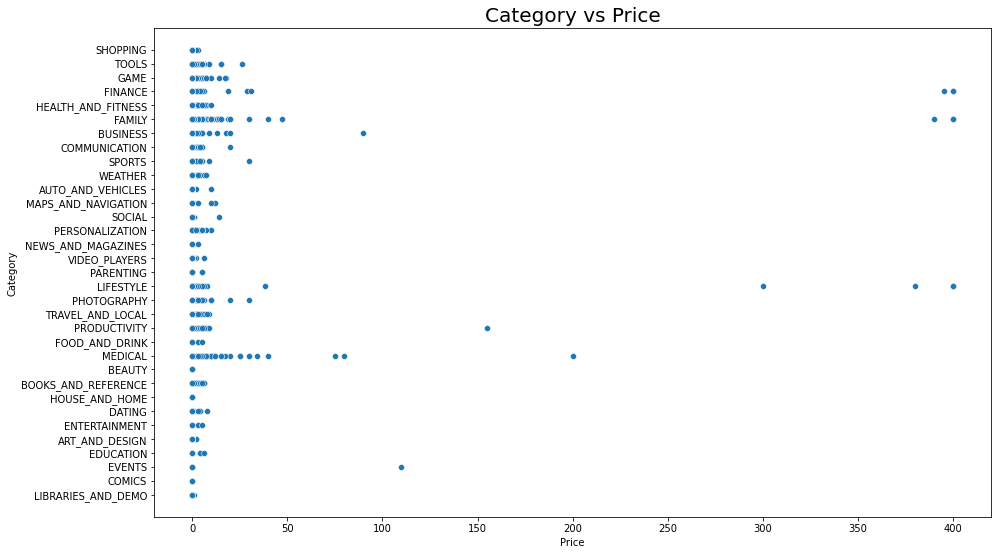

In [72]:
plt.figure(figsize=(15,9))
plt.title("Category vs Price", size=20)

sns.scatterplot(y = "Category", x = "Price", data = ps_df)
plt.show()

### **Observation:**
1. **The highest paid applications are FINANCE, LIFESTYLE, and FAMILY.**

## **Graph 10 - Pie Chart to find the percentage of Free apps and Paid apps.**

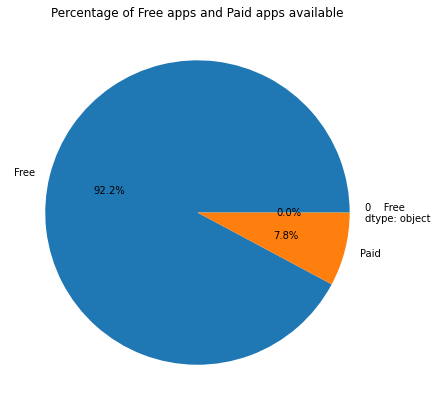

In [73]:
plt.figure(figsize = (7,7))
plt.title('Percentage of Free apps and Paid apps available')

ps_df['Type'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.axis('off')
plt.show()

## **Graph 11 - Bar Chart to show Number of Installs vs Category with Type of the app**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


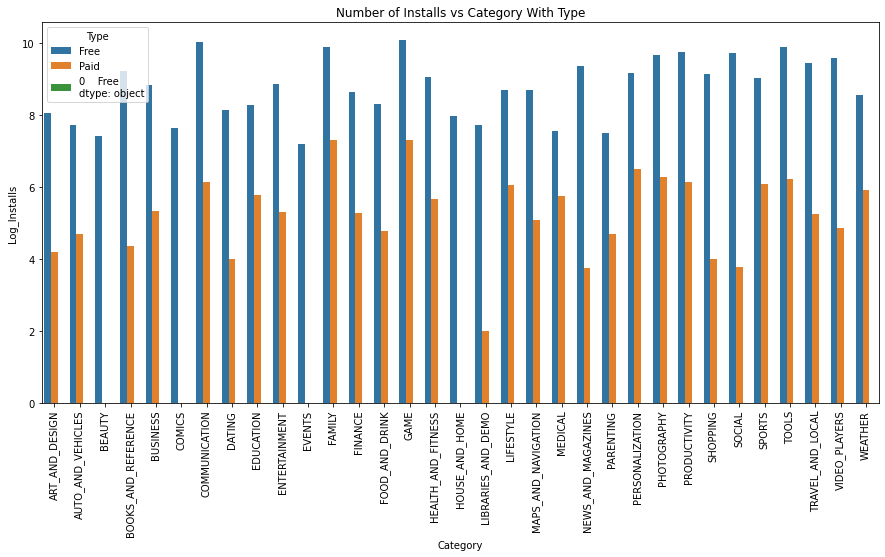

In [74]:
cat_type_install = ps_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
cat_type_install['Log_Installs'] = np.log10(cat_type_install['Installs'])

plt.figure(figsize=(15,7))
plt.title("Number of Installs vs Category With Type")

sns.barplot(x = 'Category', y = 'Log_Installs', hue = 'Type', data = cat_type_install)
plt.xticks(rotation = 90)
plt.show()

### **OBservation:**
1. **92%(Approx.) of apps in the google play store are free and 8%(Approx.) are paid.**

## **Graph 12 - Reviews vs Category**

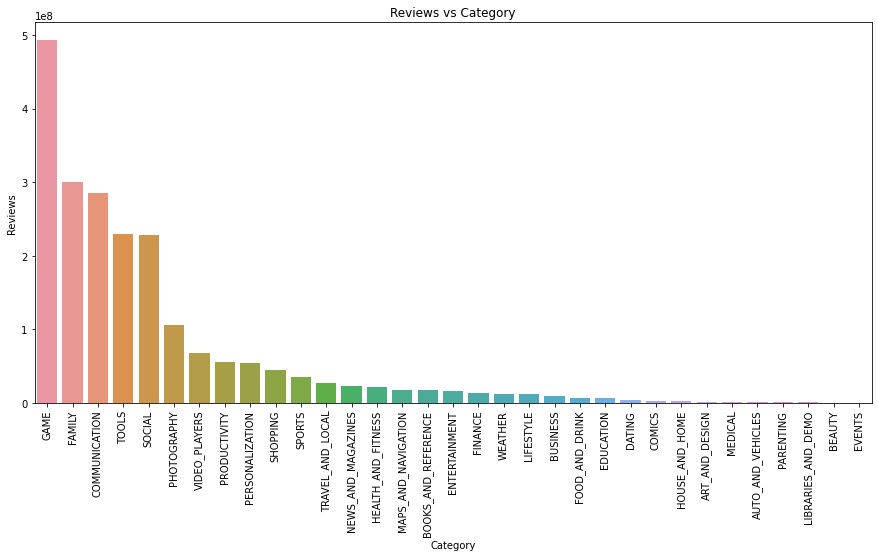

In [75]:
cat_review = ps_df.groupby(['Category'])[['Reviews']].sum().reset_index()
cat_review.sort_values(by = 'Reviews', ascending = False, inplace = True)

plt.figure(figsize=(15,7))
plt.title("Reviews vs Category")

sns.barplot(x = 'Category', y = 'Reviews', data = cat_review)
plt.xticks(rotation = 90)
plt.show()

##**Obeservation:**
1. **Top 5 categories having most number of reviews in the play store are - GAME, FAMILY, COMMUNICATION, TOOLS & SOCIAL.**

## **Graph 13 - Distribution of Size**

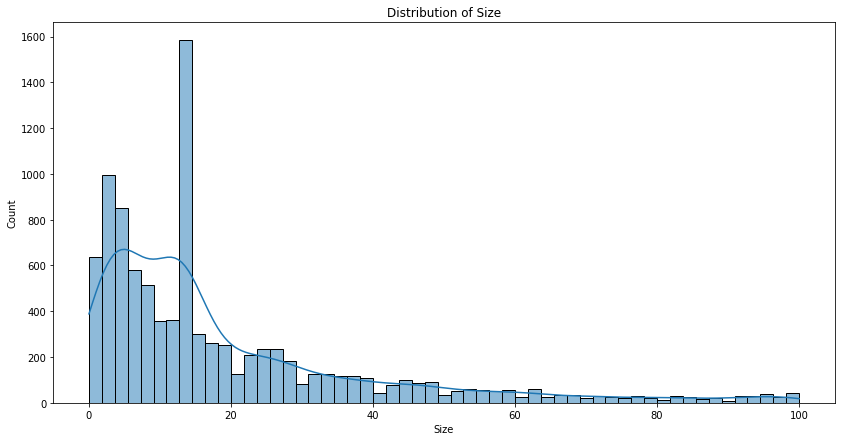

In [76]:
plt.figure(figsize=(14,7))
plt.title("Distribution of Size")

sns.histplot(ps_df['Size'], kde = True)
plt.show()

### **Observation:**
1. **Most of the apps are of smaller size.**
2. **Most of the apps are present in 5Mb-20Mb size in play store.**

In [77]:
#Correlation matrix for Play Store data set.
ps_df.corr()

,Rating,Reviews,Size,Installs,Price,Total Earning
Rating,1.000000,0.050264,0.038176,0.034398,-0.018634,0.006761
Reviews,0.050264,1.000000,0.068588,0.625081,-0.007561,0.007460
Size,0.038176,0.068588,1.000000,0.033733,-0.019771,-0.003317
Installs,0.034398,0.625081,0.033733,1.000000,-0.009374,-0.003075
Price,-0.018634,-0.007561,-0.019771,-0.009374,1.000000,0.247654
Total Earning,0.006761,0.007460,-0.003317,-0.003075,0.247654,1.000000


## **Graph 14 - Correlation heat map for the play store dataset.**

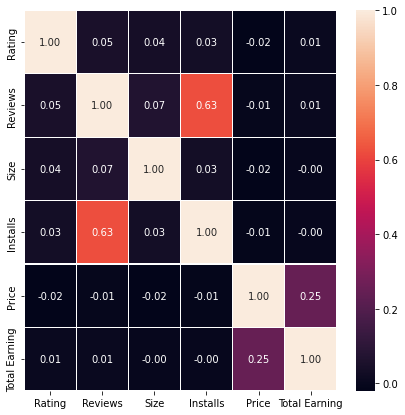

In [78]:
plt.figure(figsize = (7,7))
sns.heatmap(ps_df.corr(), annot = True, linewidths = 0.1, fmt = '0.2f')
plt.show()

### **Observation:**
1. **The relationship between the Installs and Reviews columns is 0.64.**

## **Merging the User Review dataset with the Play Store dataset.**

In [79]:
#Merging the User Review dataset with Play Store dataset in a new dataframe with name final_ps_df.
final_ps_df = ps_df.merge(ur_df, on = 'App')
final_ps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Total Earning,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
29194,Helix Jump,GAME,4.2,1500999,33.0,100000000,Free,0.0,Everyone,Action,2018-04-09,0.0,Definitely giving 3 stars. It's OK. WAY many a...,Positive,0.289031,0.533673
29733,Calorie Counter & Diet Tracker,HEALTH_AND_FITNESS,4.5,32606,13.0,1000000,Free,0.0,Everyone,Health & Fitness,2018-03-22,0.0,I issues first. Now I do. Had get new phone. A...,Positive,0.047273,0.447576
1460,Chrome Beta,PRODUCTIVITY,4.4,228794,13.0,10000000,Free,0.0,Everyone,Productivity,2018-08-06,0.0,Too bad faster enjoy pornography n masturbatin...,Negative,-0.100000,0.583333
14789,Bowmasters,GAME,4.7,1535973,13.0,50000000,Free,0.0,Teen,Action,2018-07-23,0.0,Rich guy I like rich dude cuz he's free pick n...,Positive,0.383333,0.766667
10377,Choices: Stories You Play,GAME,4.6,807338,93.0,10000000,Free,0.0,Teen,Simulation,2018-07-30,0.0,"I've playing game literally forever, I want ta...",Positive,0.265374,0.497816


**There are three main columns in the User Review dataset - Sentiment, Sentiment_Polarity and Sentiment_Subjectivity.**
  * **Sentiment:** setniment is the view or opinion of the user about the app. the opinion may be Positive, Negative or Neutral.
  * **Sentiment_Polarity:** column contains values from -1 to 1. Where -1 is the most negative polarity and 1 is the most positive polarity. This column can also contain 0 which means neutral polarity.
  * **Sentiment_Subjectivity;** contains values ranging from 0 to 1. Where 0 being the very much objective sentence and 1 is very much subjective sentence. Subjectivity refers to the degree to which a person is personally involved in an object.